In [21]:
import numpy as np
import pandas as pd

df = pd.read_csv('../source/ns-3.34/contrib/etri_mvdash/segmentSizes.txt', sep=" ", header=None)
df = df.T
df.head()

,0,1,2,3,4,5,6,7
0,3128,3254,3974,4496,6408,10938,17156,35018
1,44788,93058,243212,499214,1006390,1909944,4558232,10235930
2,83412,163088,402968,825296,1841772,3562992,8464440,18957124
3,92274,184294,457150,981130,2099710,4145746,9880024,22219182
4,56210,120228,347976,733942,1531106,2826254,6815232,14794028


In [24]:
# df.mean(1), df.std(1)
segment_duration = 2000000
for i in range(df.shape[1]) :
    rate_stat = 'Rate/QualityIndex[{}] : Mean {:>6.3f} Mbps, Std {:>6.3f} Mbps '.format(i, 
                df[i].mean()*8/segment_duration, df[i].std()*8/segment_duration)
    print(rate_stat)


Rate/QualityIndex[0] : Mean  0.176 Mbps, Std  0.101 Mbps 
Rate/QualityIndex[1] : Mean  0.348 Mbps, Std  0.201 Mbps 
Rate/QualityIndex[2] : Mean  0.902 Mbps, Std  0.507 Mbps 
Rate/QualityIndex[3] : Mean  1.876 Mbps, Std  1.032 Mbps 
Rate/QualityIndex[4] : Mean  3.939 Mbps, Std  2.131 Mbps 
Rate/QualityIndex[5] : Mean  7.565 Mbps, Std  4.097 Mbps 
Rate/QualityIndex[6] : Mean 18.361 Mbps, Std  9.876 Mbps 
Rate/QualityIndex[7] : Mean 41.002 Mbps, Std 22.210 Mbps 


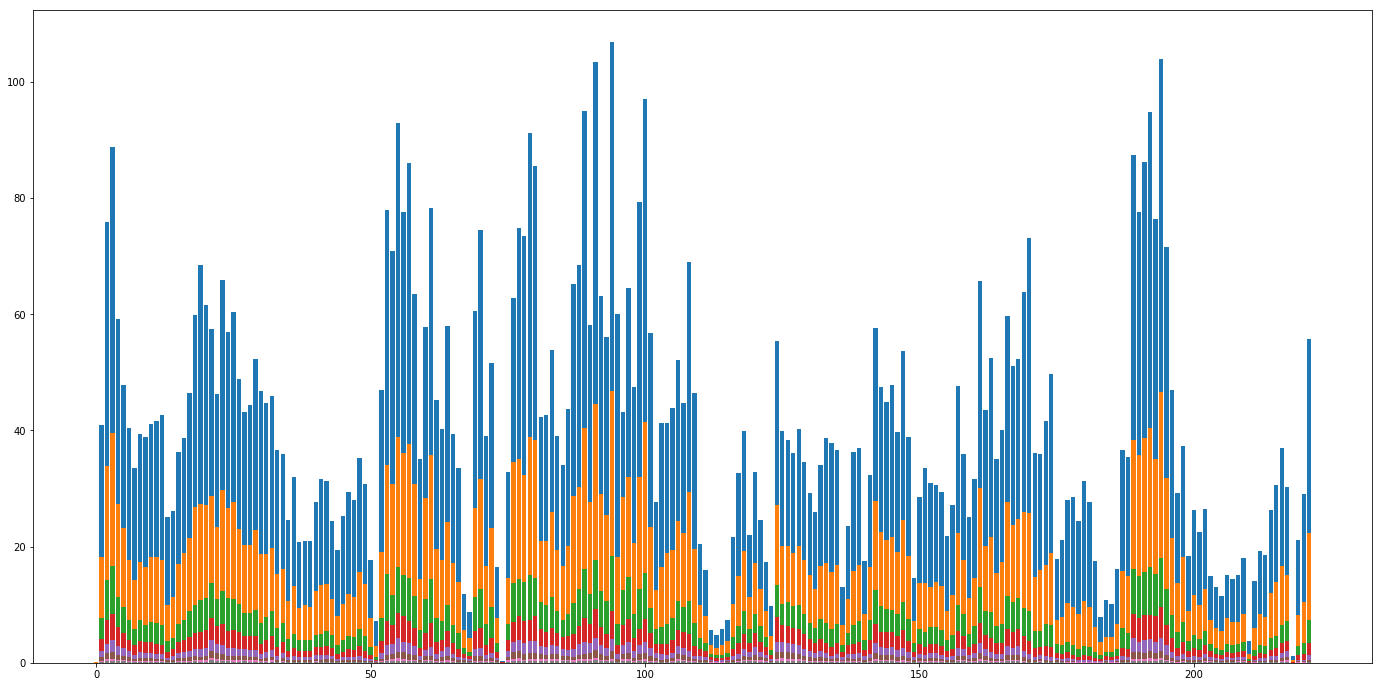

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12));
#plt.plot(range(df.shape[0]), df[[0,1,2,3,4,5,6,7]])
#df.plot.bar()
for i in range(df.shape[1]) :
    plt.bar(range(df.shape[0]), df[7-i]*8/segment_duration)
#plt.axis([0, 100, 0, 50])
plt.show()

In [26]:
def generateViewpointVideoData(basedf, rseed) :
    if rseed > 0 :
        np.random.seed(rseed)
    r_dfx = basedf.copy()
    for i in range(basedf.shape[1]) :
        r_dfx[i][1:] +=  np.random.normal(0, basedf[i].std()/40, basedf.shape[0]-1).T.astype(int)
    r_dfx[r_dfx <= 2000] = 3000
    return r_dfx

#tdfx = generateViewpointVideoData(df,1)
#tdfx.head()

In [28]:
nViewpoints = 5
nDuration = segment_duration
nSegments = df.shape[0]-1
nRates = df.shape[1]
#a_nRates = np.array([nRates, nRates, nRates, nRates, nRates])
#a_nRates = nRates * np.ones((nViewpoints,), dtype=int)
a_nRates = np.full(nViewpoints, nRates)
sFirstLine ="{} {} {} ".format(nViewpoints, nSegments, nDuration) + " ".join([str(_) for _ in a_nRates]) + "\n"

merged_df = df.copy()
for i in range(4) :
    s = '_v{}'.format(i+2)
    merged_df = merged_df.join(generateViewpointVideoData(df,1-i), rsuffix=s)    
#print(merged_df.shape, type(merged_df))

with open('../source/ns-3.34/contrib/etri_mvdash/multiviewvideo.csv', 'w') as f:
    f.write(sFirstLine)
    merged_df.to_csv(f,sep="\t", header=None, index=False)
    
merged_df.head()

,0,1,2,3,4,5,6,7,0_v2,1_v2,...,6_v4,7_v4,0,1,2,3,4,5,6,7
0,3128,3254,3974,4496,6408,10938,17156,35018,3128,3254,...,17156,35018,3128,3254,3974,4496,6408,10938,17156,35018
1,44788,93058,243212,499214,1006390,1909944,4558232,10235930,45815,93688,...,4665649,10167258,44673,92842,242931,505043,984785,1874102,4541710,10340154
2,83412,163088,402968,825296,1841772,3562992,8464440,18957124,83025,165043,...,8453982,18800622,82568,161316,399792,825462,1831901,3557465,8443042,18980112
3,92274,184294,457150,981130,2099710,4145746,9880024,22219182,91940,184431,...,9921272,22231857,91169,185913,458020,973886,2113061,4154825,9916405,22304943
4,56210,120228,347976,733942,1531106,2826254,6815232,14794028,55532,118699,...,6746818,14624462,56726,121604,346546,735703,1513594,2819378,6776484,14714879


In [3]:
# Obsolete Code - Ignore it
# df.shape[0] - number of rows/segments
nseg = df.shape[0]
rng = np.random.seed(1)
pa_std = df.std(0)/100

dfx = df.copy()
for i in range(df.shape[1]) :
    dfx[i][1:] += np.random.normal(0, pa_std[i], nseg-1).T.astype(int)
    
print("# of too small segments", (dfx<=1000).sum().sum())
dfx.head()



# of too small segments 0


,0,1,2,3,4,5,6,7
0,3128,3254,3974,4496,6408,10938,17156,35018
1,45199,93310,241741,496687,1002300,1907769,4562829,10266142
2,83258,163870,404680,827082,1839830,3544818,8485630,18961493
3,92141,184348,456730,979896,2097261,4142549,9887871,22152920
4,55939,119617,348466,733094,1540192,2818976,6804698,14709295


In [12]:
# Obsolete Code - Ignore it
nRates = df.shape[1]
print(nRates, type(nRates))
a_nRates1 = np.array([nRates, nRates, nRates, nRates, nRates])
a_nRates2 = nRates * np.ones((nViewpoints,), dtype=int)
a_nRates3 = np.full(nViewpoints, nRates)

print(a_nRates1, a_nRates1.shape)
print(a_nRates2, a_nRates2.shape)
print(a_nRates3, a_nRates3.shape)


8 <class 'int'>
[8 8 8 8 8] (5,)
[8 8 8 8 8] (5,)
[8 8 8 8 8] (5,)


In [4]:
import numpy as np
import pandas as pd

df_mv = pd.read_csv('../source/ns-3.34/contrib/etri_mvdash/multiviewvideo.csv', sep="\t", header=None, skiprows=1)
df_mv.head()
df_mv.to_csv('../source/ns-3.34/x.csv')